# DATA 200 PROJECT 2 - TRA DINH

## Import the needed libraries

In [1]:
import sqlalchemy as sa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Connect to the IMDb database

In [2]:
cstring = 'sqlite+pysqlite:///imdb.db'
engine = sa.create_engine(cstring)
connection = engine.connect()

# Function Definition 1: Filmmaker's analysis

In the code cell below we define analyzeCrew(dbcon, position, producer_name) function. This function is designed to analyze and provide basic insights about a filmmaker career based on data strored in the imdb.db database. Here's a breakdown of what it does:

**SQL Query Construction:** The function constructs SQL queries using a text-based approach with binding. These queries are used to extract specific information from the database related to the filmmaker's bio.

**Executing SQL Queries:** After constructing the SQL queries, the function binds the necessary parameters (like the filmmaker's name) and executes the queries using Pandas' `read_sql_query()` function to read the SQL results into a DataFrame.

**Textual Output:** The function then prints out textual information about the filmmaker's career, including the day they were born, the year they died, their highest-rated film, and their lowest-rated film.

**Data Visualization:** This code generates a bar graph that visualizes the ratings of movies associated with a specific position or category throughout a filmmaker's career, providing a quick and intuitive way to analyze the data.

In [3]:
def AnalyzeCrew(dbcon,position, producer_name):
    
    # Define the SQL query needed for the text output using the binding method
    pyquery = """
    SELECT crew.job, titles.title_id,titles.primary_title, people.name,people.born,people.died, ratings.rating
    FROM titles
    INNER JOIN crew USING (title_id)
    INNER JOIN ratings USING (title_id)
    INNER JOIN people ON crew.person_id = people.person_id
    WHERE crew.job IS NOT NULL AND crew.job = :position_in AND name = :name_in
    GROUP BY titles.primary_title
    """
    # Bind the query
    prepare_stmt = sa.sql.text(pyquery)
    bound_stmt = prepare_stmt.bindparams(name_in = producer_name, position_in = position)
    
    # Pass the query to the DBMS and obtain the resulting table as a dataframe
    df = pd.read_sql_query(bound_stmt, dbcon)

    print(position.capitalize() + " :" + producer_name)
    print("------------------------------------")


    # Print the textual output
   
    born = df.born.min()
    died = df.died.max()
    # Print the textual output
    if pd.notnull(born) and pd.notnull(died):
        print('Born in ' + str(born) + ' and passing away in ' + str(died) + ', the ' + position + ' left an enduring legacy that shaped the industry for years to come.')
    elif pd.notnull(born) and pd.isnull(died):
        print('Born in ' + str(born) + ', the ' + position + ' is still alive and continues to influence the industry.')
    else:
        print('The ' + position + ' left an enduring legacy that shaped the industry for years to come, though birth and death information is not available.')

    #Print the lowest rated movie and max rated movie
    print()
    lowest = df.rating.argmin()
    print("Lowest rated film: " + df.primary_title[lowest] + "  (rating: " 
          + str(df.rating[lowest]) + ")")
    print()
    highest = df.rating.argmax()
    print("Highest rated film: " + df.primary_title[highest] + "  (rating: " 
          + str(df.rating[highest]) + ")")
    print('------------------------------------')
    pivot_df = df.pivot(index="primary_title", columns="name", values="rating")
    
    
    #######################################
    

    # Plot bar graph
    plt.figure(figsize=(12, 8))
    plt.barh(df['primary_title'], df['rating'], color='mediumturquoise')
    plt.xlabel('Rating')
    plt.ylabel('Movie')
    plt.title('Ratings of Movies Associated with ' + position.capitalize() + ": " + producer_name)
    plt.gca().invert_yaxis()  # Invert y-axis to display highest rated movie at the top
    plt.grid(axis='x')
    plt.show()

# Test Case 1: Steven Spielberg

Producer :Steven Spielberg
------------------------------------
Born in 1946, the producer is still alive and continues to influence the industry.

Lowest rated film: An American Tail: Fievel Goes West  (rating: 6.5)

Highest rated film: A Hollow Man  (rating: 8.0)
------------------------------------


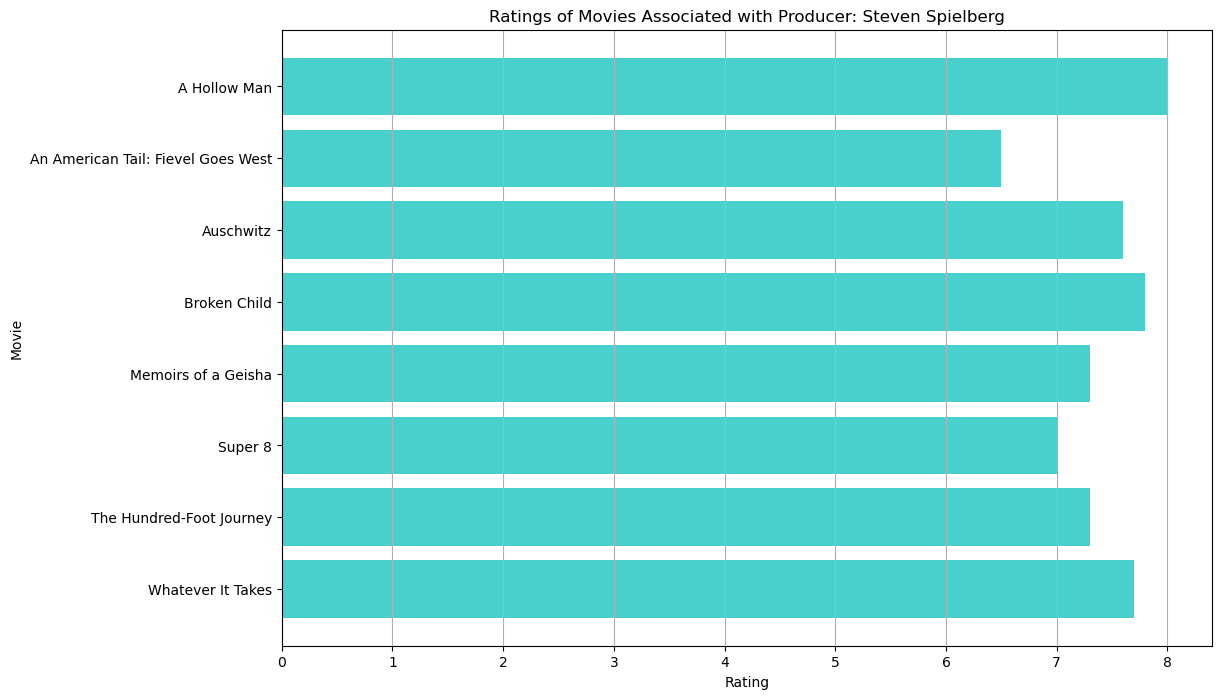

In [4]:
AnalyzeCrew(connection,'producer', "Steven Spielberg")

### Analysis of Output
The ratings provided for Steven Spielberg's movies offer a glimpse into the quality and reception of his productions. 

**Highest Rated Film**: "A Hollow Man" stands out as the highest-rated film in the dataset, receiving a solid rating of 8.0. This suggests that it was well-received by audiences or critics, reflecting positively on Spielberg's involvement as a producer.

**Lowest Rated Film**: "An American Tail: Fievel Goes West" has the lowest rating among the listed movies, scoring 6.5. While still respectable, this rating indicates a slightly lower level of acclaim compared to Spielberg's other productions in this dataset.

**Overall Consistency**: The majority of Spielberg's movies listed in the dataset fall within a relatively narrow range of ratings, ranging from 6.5 to 8.0. Most of his movies are ranging from 7 to 8. This suggests a consistent level of quality across his filmography, with most productions being well-received by audiences or critics.

# Test Case 2: Seoung Hu Park

Director :Seong-Hu Park
------------------------------------
The director left an enduring legacy that shaped the industry for years to come, though birth and death information is not available.

Lowest rated film: Marriage/bonds  (rating: 6.6)

Highest rated film: Oath/Meaning  (rating: 9.2)
------------------------------------


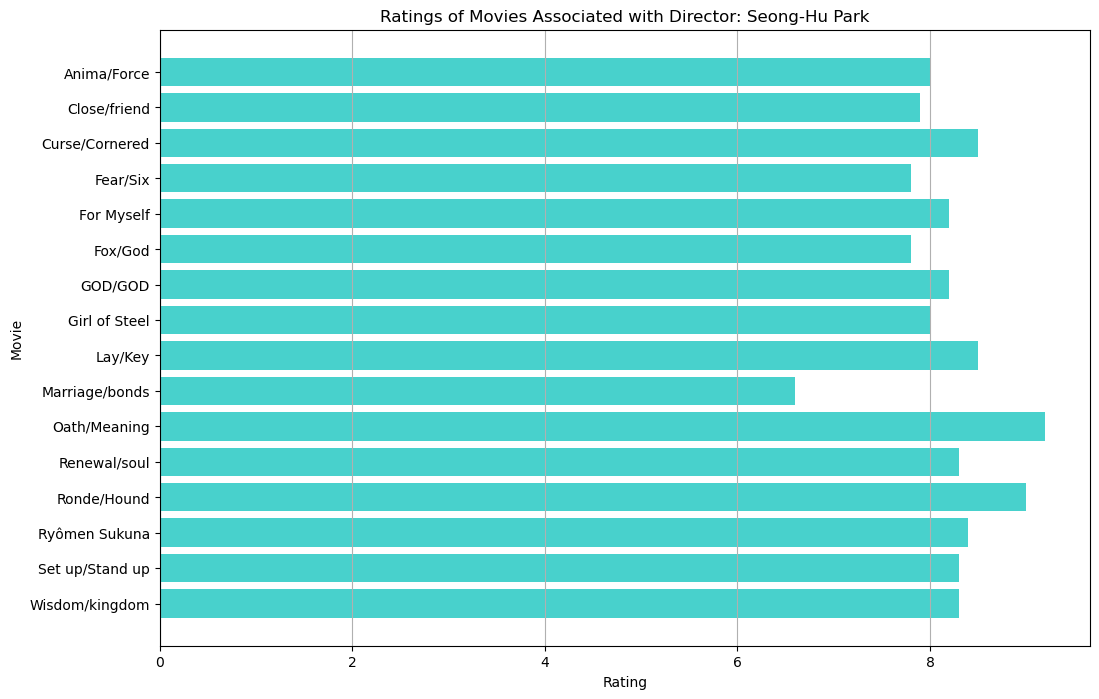

In [5]:
AnalyzeCrew(connection,'director', "Seong-Hu Park")

## Analysis of Output
The ratings provided for Seong-Hu Park's movies offer a glimpse into the quality and reception of his productions. 

**Highest Rated Film**: "Oath/Meaning" stands out as the highest-rated film directed by Seong-Hu Park, earning an impressive rating of 9.2. This indicates strong acclaim and suggests it may be a standout work in Park's filmography.

**Lowest Rated Film**: "Marriage/bonds" is the lowest-rated film associated with Seong-Hu Park, with a rating of 6.6. This suggests that it may not have been as well-received by audiences or critics compared to other films directed by Park.

**Overall Consistency**: The ratings range from 6.6 to 9.2, indicating a diverse range of reception across Park's filmography.Most of his movies are higher than 8.

# Function Definition 2: Analyze a movie and compare it with others in the same genre and year.

The code cell below defines the `movieInfo(dbcon, movie_names)` function, aimed at analyzing and presenting basic insights about a user-input movie based on data stored in the `imdb.db` database. It extracts details like genre, premiere year, end year, rating, votes, and region. 

**SQL Query Construction:** This function constructs SQL queries using a text-based approach with binding. These queries are tailored to retrieve specific movie-related information from the database, involving joins between tables such as titles, crew, principals, and ratings to gather comprehensive data.

**Executing SQL Queries:** Once the SQL queries are constructed, the function prepares and executes them using SQLAlchemy's text-based method. It binds the parameter `movie_name` to enable users to input the movie they want to gather information on. These queries are then executed against the provided database connection (dbcon), and the results are fetched into a Pandas DataFrame using `read_sql_query()`.

**Textual Output:** After retrieving the data, the function prints out textual details about the movie's genres, premiere year, end year, rating, votes, and region.

**Data Visualization:** Additionally, the code generates a scatter plot to compare the popularity (votes) with the average rating of the user's movie in comparison with others in the same genre and year.

In [6]:
def movieInfo(dbcon, movie_names):
    pyquery = """
        SELECT titles.primary_title, titles.genres, titles.premiered, titles.ended, ratings.rating, ratings.votes, akas.region
        FROM titles
        INNER JOIN ratings USING (title_id)
        INNER JOIN akas using (title_id)
        WHERE titles.primary_title = :name_in AND akas.region = "US"
        GROUP BY primary_title
    """
    prepare_stmt = sa.sql.text(pyquery)
    bound_stmt = prepare_stmt.bindparams(name_in=movie_names)
    df = pd.read_sql_query(bound_stmt, dbcon)
    
    print("Movie Name:", movie_names)
    print('------------------------------------')
    
    for index, row in df.iterrows():
        print("Genres:", row['genres'])
        print("Premiered Year:", row['premiered'])
        if pd.isnull(row['ended']):
            print("End Year: Ongoing")
        else:
            print("End Year:", row['ended'])
        print("Rating:", row['rating'])
        print("Votes:", row['votes'])
        print("Region:", row['region'])
        print('------------------------------------')
        
        # Extract region, genre, and premiered year
        region = row['region']
        genre = row['genres']
        premiered_year = row['premiered']
        
        # Construct a new query to retrieve other movies with the same region, genre, and premiered year
        similar_movies_query = """
            SELECT titles.primary_title, ratings.rating, ratings.votes
            FROM titles
            INNER JOIN ratings USING (title_id)
            INNER JOIN akas USING (title_id)
            WHERE titles.genres LIKE :genre
            AND titles.premiered = :premiered_year
            AND titles.primary_title != :name_in
        """
        similar_movies_stmt = sa.sql.text(similar_movies_query)
        similar_movies_params = { 'genre': f'%{genre}%', 'premiered_year': premiered_year, 'name_in': movie_names}
        similar_movies_bound_stmt = similar_movies_stmt.bindparams(**similar_movies_params)
        similar_movies_df = pd.read_sql_query(similar_movies_bound_stmt, dbcon)
        
        # Calculate the average rating and total votes for each movie
        average_ratings = similar_movies_df.groupby('primary_title').agg({'rating': 'mean', 'votes': 'mean'}).reset_index()
        
        # Create a scatter plot comparing average ratings of the user's input movie with other movies in the same region, genre, and premiered year
        user_movie_votes = row['votes']
        user_movie_rating = row['rating']
        
        other_movies = average_ratings['primary_title']
        other_movies_votes = average_ratings['votes']
        other_movies_ratings = average_ratings['rating']
        
        plt.figure(figsize=(10, 6))
        plt.scatter(other_movies_ratings, other_movies_votes, color='mediumturquoise', label='Other Movies')
        plt.scatter(user_movie_rating, user_movie_votes, color='red', label= movie_names)
        plt.xlabel('Average Rating')
        plt.ylabel('Total Votes')
        plt.title("Votes and Ratings of " + movie_names + " within the same genre and year, specifically focusing on the US.")
        plt.tight_layout()
        plt.show()

# Test Case 1: The Justice of Bunny King

Movie Name: The Justice of Bunny King
------------------------------------
Genres: Drama
Premiered Year: 2021
End Year: Ongoing
Rating: 6.6
Votes: 347
Region: US
------------------------------------


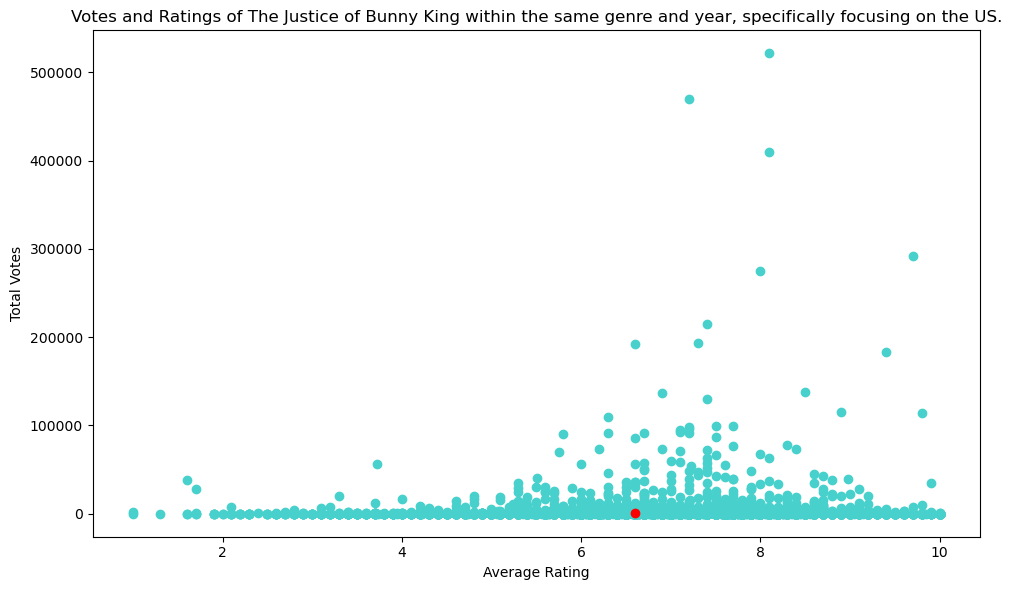

In [7]:
movieInfo(connection, "The Justice of Bunny King")

## Analysis of Output
Belonging to the drama genre, the movie premiered in 2021 and is currently ongoing. It has accrued a rating of 6.6 from 347 votes.

Examining the graph, a correlation emerges between a movie's popularity—measured by its total votes—and its rating. Notably, "The Justice of Bunny King" has amassed a comparable number of votes to other dramas. With its rating of 6.6, it occupies a midrange position within the drama category, indicating it has received a respectable reception from audiences.

# Test Case 2: Gossip Girl

Movie Name: Gossip Girl
------------------------------------
Genres: Drama,Romance
Premiered Year: 2007
End Year: 2012
Rating: 7.5
Votes: 168535
Region: US
------------------------------------


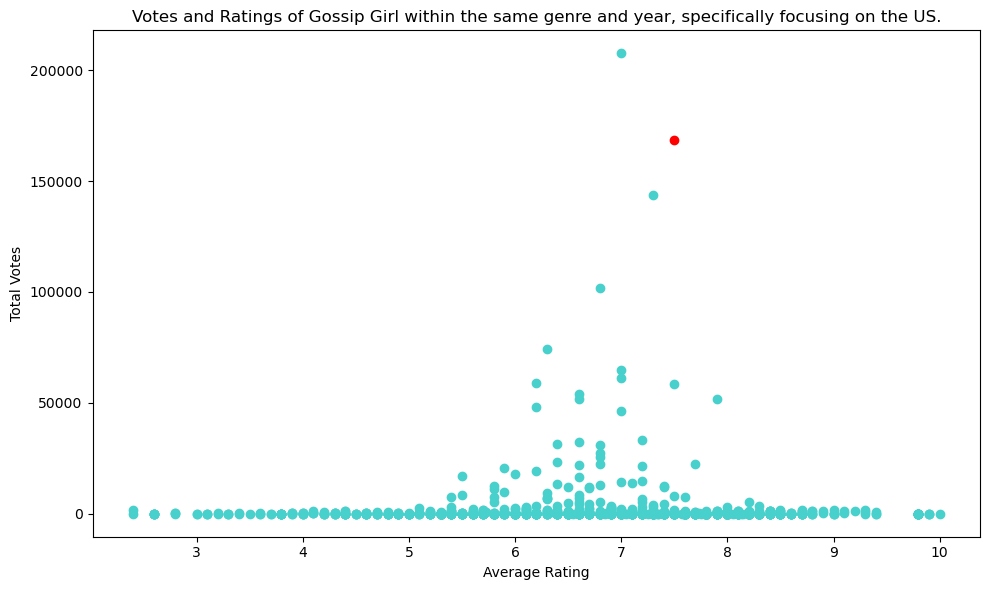

In [8]:
movieInfo(connection, "Gossip Girl")

## Analysis of Output

'Gossip Girl', a drama and romance series that premiered in 2007 and concluded in 2012, we notice its significant impact in the US market. With a commendable rating of 7.5 from a substantial 168,535 votes, it stands out as one of the most popular releases of its year. This popularity is not without merit, as there's a discernible positive correlation between its high number of votes and its impressive average rating. Within the drama and romance genres, where ratings typically range between 6 to 7, 'Gossip Girl' maintains a consistent level of quality, earning it a prominent position among similar titles.